In [1]:
import numpy as np
import pandas as pd

In [2]:
data_path = "data/emotion_sentimen_dataset.csv"
df = pd.read_csv(data_path, encoding='utf-8')

### Initial dataset transformations

In [3]:
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [4]:
del df['Unnamed: 0']

In [5]:
df = df.rename(columns={"Emotion":"emotion"})

In [6]:
df.head()

,text,emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral


### EDA and Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Existance of missing values 

In [8]:
df.isnull().any()

text       False
emotion    False
dtype: bool

===> Nothing to complete

In [9]:
df.describe()

,text,emotion
count,839555,839555
unique,393822,13
top,i feel more adventurous willing to take risks,neutral
freq,32,674538


Let's consider the distribution of emotion classes

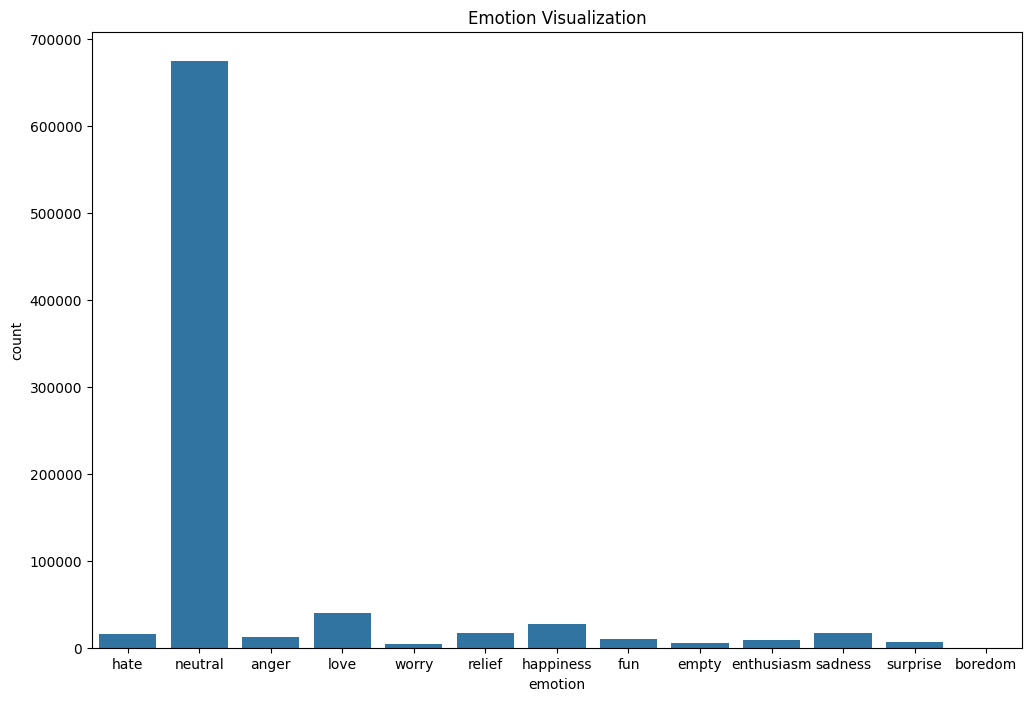

In [10]:
labels, counts = np.unique(df['emotion'], return_counts=True)

plt.figure(figsize=(12,8))
sns.countplot(x='emotion', data = df)
plt.title('Emotion Visualization')
plt.show()

## Text tokenization 

Import of vectorization module and train/test splits, stopwords downloading

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vadimpp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Splitting dataframe on train and test 
X_train, X_test, y_train, y_test = train_test_split(df.text.str.lower(),df.emotion,shuffle=True,test_size=0.2)

# Vectorization with normalization (Includes counter and transformation)
vectorizer = TfidfVectorizer(
    stop_words=nltk.corpus.stopwords.words('english'), # List of high occcurenced stop words ['and', 'to', etc. ] to exclude from word relations matrix
    ngram_range=(1,1) # Every word will be trated separetly from his neighbors
)
# Vectorization of train and test
vectorizer.fit_transform(df.text.str.lower()) 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7598087 stored elements and shape (839555, 75132)>

In [21]:
X_tr = vectorizer.transform(X_train)
X_ts = vectorizer.transform(X_test)

### Model selection

Before choising model and quality metrics we must respond to "What is our task and how should quality be evaluated to present the solution that best fits the idea of the task ? " 

First of all our tast : emotions detection, so multi class classification is required. So idea is to try some canonical classifiers, but how to evaluate and compare them? 

Im case of emotion dataset a strong class disbalance ( approximarely 80% of sample are classified like "neutral" ) F1 is adequat.

### Starting from Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', max_iter=500, C=1)
model.fit(X_tr, y_train)
pred = model.predict(X_ts)


In [41]:
from sklearn import metrics

print("Score : ", metrics.f1_score(pred,y_test,average="weighted"))

Score :  0.9921062142122515


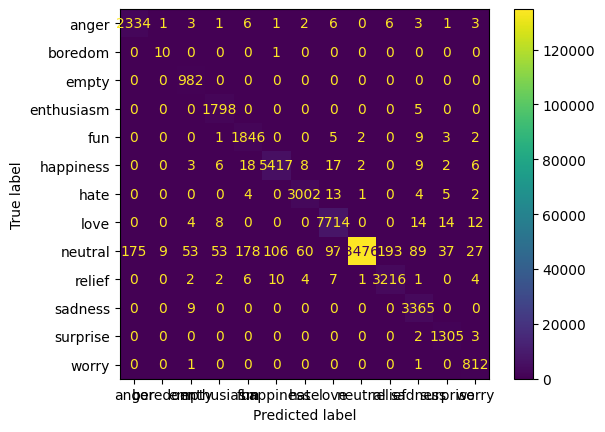

In [33]:
metrics.ConfusionMatrixDisplay.from_predictions(pred,y_test)

In [42]:
metrics.classification_report(pred,y_test)

'              precision    recall  f1-score   support\n\n       anger       0.93      0.99      0.96      2367\n     boredom       0.50      0.91      0.65        11\n       empty       0.93      1.00      0.96       982\n  enthusiasm       0.96      1.00      0.98      1803\n         fun       0.90      0.99      0.94      1868\n   happiness       0.98      0.99      0.98      5488\n        hate       0.98      0.99      0.98      3031\n        love       0.98      0.99      0.99      7766\n     neutral       1.00      0.99      1.00    135844\n      relief       0.94      0.99      0.96      3253\n     sadness       0.96      1.00      0.98      3374\n    surprise       0.95      1.00      0.97      1310\n       worry       0.93      1.00      0.96       814\n\n    accuracy                           0.99    167911\n   macro avg       0.92      0.99      0.95    167911\nweighted avg       0.99      0.99      0.99    167911\n'